In [65]:
import librosa as lr
import librosa.display as lrd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
%matplotlib inline

from pink_noise import powerlaw_psd_gaussian

In [66]:
x, sr = lr.load('/data/riccardo_datasets/npr_news/train/newscast230841.wav', sr=None, duration=10, offset=2)
s = np.abs(lr.stft(x))

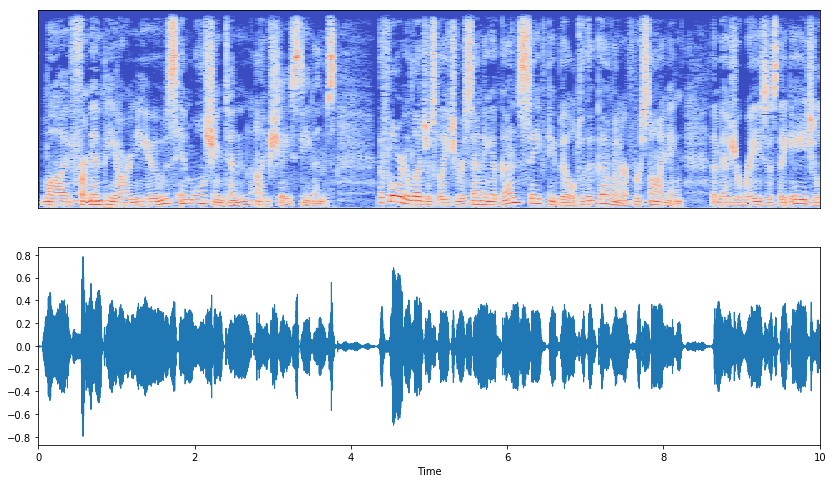

In [67]:
plt.figure(figsize=(14, 8))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s))
plt.subplot(212)
lrd.waveplot(x, sr=sr)
ipd.Audio(x, rate=sr)

In [68]:
SNR_dB = 10
snr = 10.0**(SNR_dB/10.0)

x_power = x.var()
n_power = x_power/snr

noise = np.sqrt(n_power) * n 
noisyx = x + noise

s_noise = np.abs(lr.stft(noise))
s_noisyx = np.abs(lr.stft(noisyx))

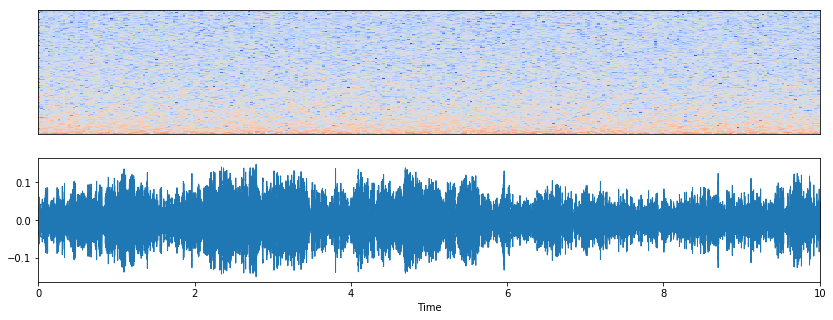

In [69]:
plt.figure(figsize=(14, 5))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s_noise))
plt.subplot(212)
lrd.waveplot(noise, sr=sr)
ipd.Audio(noise, rate=sr)

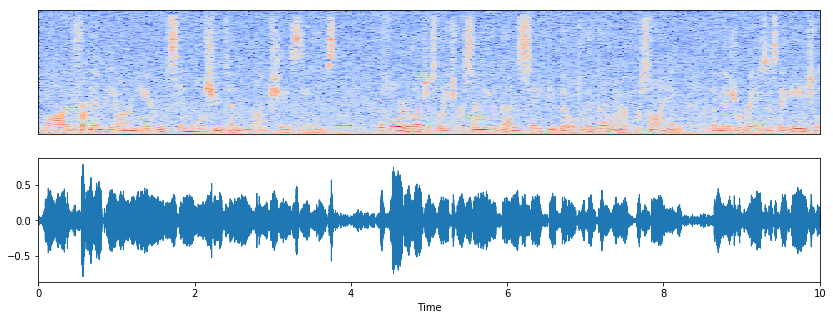

In [70]:
plt.figure(figsize=(14, 5))
plt.subplot(211)
lrd.specshow(lr.amplitude_to_db(s_noisyx))
plt.subplot(212)
lrd.waveplot(noisyx, sr=sr)
ipd.Audio(noisyx, rate=sr)

In [71]:
a = np.array([1,2,3,4,5,6,7,8,9])

In [75]:
np.sqrt(np.mean( (a-a.mean()) **2))

2.581988897471611

In [76]:
a.std()

2.581988897471611